# Predicting  Bike Rentals

In this project, we'll try to predict the total number of bikes people rented in a given hour. We'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, we'll create a few different machine learning models and evaluate their performance.

We can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

## 1. Introduction to the Dataset

Here are the descriptions for the relevant columns:

* instant - A unique sequential ID number for each row
* dteday - The date of the rentals
* season - The season in which the rentals occurred
* yr - The year the rentals occurred
* mnth - The month the rentals occurred
* hr - The hour the rentals occurred
* holiday - Whether or not the day was a holiday
* weekday - The day of the week (as a number, 0 to 7)
* workingday - Whether or not the day was a working day
* weathersit - The weather (as a categorical variable)
* temp - The temperature, on a 0-1 scale
* atemp - The adjusted temperature
* hum - The humidity, on a 0-1 scale
* windspeed - The wind speed, on a 0-1 scale
* casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* registered - The number of registered riders (people who had already signed up)
* cnt - The total number of bike rentals (casual + registered)

In [16]:
import pandas as pd
bike_rentals  = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


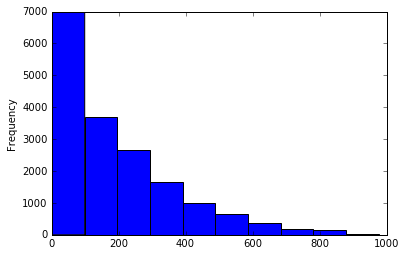

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

bike_rentals['cnt'].plot.hist()

In [18]:
bike_rentals.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

## 2. Calculating Features

In [19]:
# conver hour to time_label catagory
def assign_label(hour):
    if hour >=0 and hour <6:
        return 4
    elif hour >=18 and hour <24:
        return 3
    elif hour >=12 and hour <18:
        return 2
    elif hour >=6 and hour <12:
        return 1

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

## 3. Splitting the Data & Create feature list

In [20]:
train=bike_rentals.sample(frac=0.8,random_state=100) #random state is a seed value
test= bike_rentals.drop(train.index)

features = bike_rentals.columns.tolist()

remove_features = ['cnt', 'casual', 'dteday', 'registered']
for feature in remove_features:
    features.remove(feature)

## 4. Applying Liner Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[features], train['cnt'])     # or train[col_lst]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
predictions = lr.predict(test[features])
mse = mean_squared_error(test['cnt'], predictions)
mse

17918.668954090568

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts.  Larger errors are penalized more with MSE, which leads to a higher total error.

## 5. Apply Decision Trees

In [23]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(min_samples_leaf=5)
clf.fit(train[features], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [24]:
prediction2 = clf.predict(test[features])
mse = mean_squared_error(test['cnt'], prediction2)
mse

2821.980989992276

In [25]:
# Try min_samples_leaf=4
clf = DecisionTreeRegressor(min_samples_leaf=4)
clf.fit(train[features], train["cnt"])
prediction2 = clf.predict(test[features])
mse = mean_squared_error(test['cnt'], prediction2)
mse

2786.9325222353996

Decsion tree has much higher accuracy that Lineer Regression

## 6. Applying Radom Forests

In [26]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(min_samples_leaf=5)
regr.fit (train[features], train["cnt"])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [27]:
prediction3 =regr.predict(test[features])
mse = mean_squared_error(test['cnt'], prediction3)
mse

2052.5207485646765

## Conclusion

RandomForest has the smaller mse, which means RandomForest is better than Decsion tree and Lineer Regression in this case